# Logistic Regression

## Goal:
Classificate student attendance based on two exams scores.

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import fmin_bfgs

# do ploting inline instead of in a separate window
%matplotlib inline

In [2]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, mpl_toolkits

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
mpl_toolkits The 'mpl_toolkits' distribution was not found and is required by the application
Sun Feb 12 23:00:52 2017 EET

In [3]:
data = pd.read_csv("./data/exam-scores(exam1_exam2_admitted).txt", names=['exam1', 'exam2', 'admitted'], header=None)

In [4]:
data.head(5)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.tail(5)

,exam1,exam2,admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


## Initial Data Visualizaion

In [6]:
admitted = data.loc[data['admitted'] == 1]
not_admitted = data.loc[data['admitted'] == 0]
print('Number of admitted students: {}'.format(len(admitted)))
print('Number of not admitted students: {}'.format(len(not_admitted)))

Number of admitted students: 60
Number of not admitted students: 40


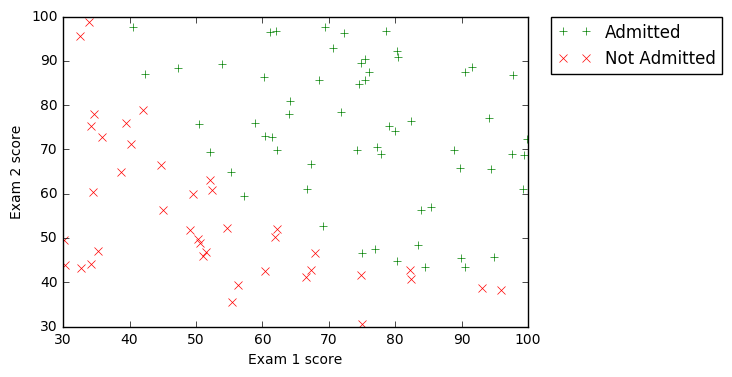

In [7]:
plt.figure()
plt.plot(admitted['exam1'].values, admitted['exam2'].values, 'g+', label='Admitted')
plt.plot(not_admitted['exam1'].values, not_admitted['exam2'].values, 'rx', label='Not Admitted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

## Cost Function:

In [8]:
X = data[['exam1', 'exam2']]
X['_bias'] = 1
X = X[['_bias', 'exam1', 'exam2']].values
y = data[['admitted']].values

In [9]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def costFunction(theta, X, y, reg_alpha):
    theta = np.array([theta]).T
    m = X.shape[0]
    J  = - np.sum(np.multiply(y, np.log(sigmoid(np.dot(X, theta)))) + np.multiply(1 - y,  np.log(1 - sigmoid(np.dot(X, theta))))) / m + reg_alpha * np.sum(np.delete(theta, 0, 0) ** 2) / (2 * m)
    return float(J)

def computeGradients(theta, X, y, reg_alpha):
    theta = np.array([theta]).T
    m = X.shape[0]
    grad = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y)) / m
    temp = theta
    temp[0, 0] = 0
    grad = grad + reg_alpha * temp / m
    return grad.flatten()

def trainLinearReg(X, y, reg_alpha):
    initial_theta = [0] * X.shape[1]
    opt_theta = fmin_bfgs(costFunction, fprime=computeGradients, x0=initial_theta, args=(X, y, reg_alpha), maxiter=50)
    return opt_theta

In [10]:
opt_theta = trainLinearReg(X, y, 0)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


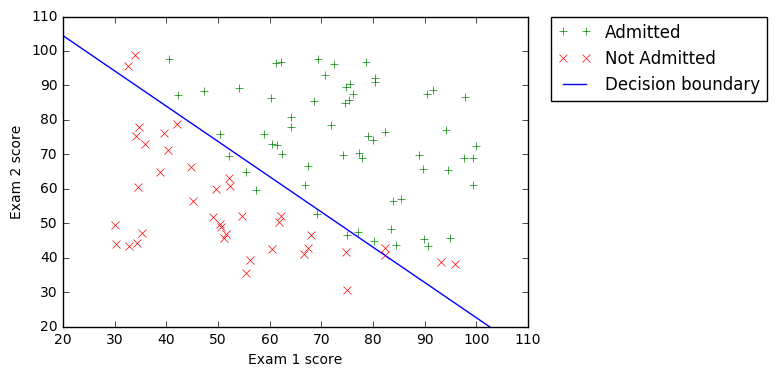

In [11]:
plt.figure()
plt.ylim([20, 110])
plt.xlim([20, 110])
plt.plot(admitted['exam1'].values, admitted['exam2'].values, 'g+', label='Admitted')
plt.plot(not_admitted['exam1'].values, not_admitted['exam2'].values, 'rx', label='Not Admitted')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
x_b = np.array([20, 110])
y_b = -(1 / opt_theta[2]) * (opt_theta[1] * x_b + opt_theta[0]);
plt.plot(x_b, y_b, label='Decision boundary')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()